In [30]:
# set environment variables
import sys
import os
path = "/Users/israfelsalazar/Documents/deep-genomic.nosync/deep-genomic/"
sys.path.append(path)
os.environ["WORKDIR"] = path
from tqdm import tqdm

# common imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import torch

# torch
from torch.utils.data import DataLoader

# local imports
from modeling.generator import Generator
from modeling.models import StudentTeacherModel
from datasets.genomic_environmental_dataset import load_data, load_conditions
from train.train_generative import set_seed

%load_ext autoreload
%autoreload 

data_dir = "../data/sim1"


set_seed(42)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
results_dir = "../experiment_outputs/sim1/"
model = StudentTeacherModel.from_pretrained(results_dir)

2022-06-29 15:42:41,142 - modeling.genomic_model - INFO - Loading model from {model_path}
2022-06-29 15:42:41,155 - modeling.genomic_model - INFO - Resolved config from ../experiment_outputs/sim1/config.json
2022-06-29 15:42:41,290 - modeling.genomic_model - INFO - Loaded weights from ../experiment_outputs/sim1/pytorch_model.bin


In [32]:
generator = Generator(model, ["var_current.csv"], data_dir)

In [4]:
c_current = torch.tensor(load_conditions(["var_current.csv"],data_dir, True),dtype=torch.float)
c_future = torch.tensor(load_conditions(["var_future.csv"],data_dir, True),dtype=torch.float)

In [14]:
mu, logvar = model.prior(c_current)
pmu, plogvar = model.prior(c_future)

In [15]:
from datasets.utils import filter_by
mu_reconstructed = filter_by(mu.detach().numpy(), generator.population)
mu_generated = filter_by(pmu.detach().numpy(), generator.population)

In [33]:
r2, genomic_offset, fitness_offset, predicted_fitness = generator.compute_r2(qtls=False)

2022-06-29 15:42:46,175 - modeling.generator - INFO - R2: 0.2479016904750273
2022-06-29 15:42:46,175 - modeling.generator - INFO - R2: 0.2479016904750273


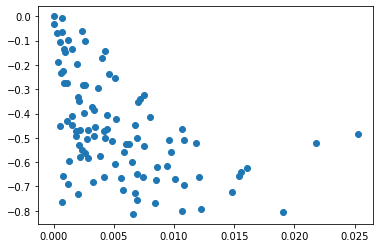

In [34]:
plt.scatter(genomic_offset, fitness_offset)

In [18]:
a = np.random.randint(0,50,(100,2333))

In [27]:
a / np.max(a,axis=1,keepdims=True)

array([[0.46938776, 0.40816327, 0.30612245, ..., 0.93877551, 0.59183673,
        0.57142857],
       [0.44897959, 0.51020408, 0.42857143, ..., 0.48979592, 0.67346939,
        1.        ],
       [0.81632653, 0.63265306, 0.24489796, ..., 0.02040816, 0.97959184,
        0.93877551],
       ...,
       [0.28571429, 0.40816327, 0.93877551, ..., 0.83673469, 0.71428571,
        0.48979592],
       [0.06122449, 0.51020408, 0.34693878, ..., 0.24489796, 0.55102041,
        0.2244898 ],
       [0.42857143, 0.6122449 , 0.24489796, ..., 0.24489796, 0.71428571,
        0.28571429]])